CUSTOMER SEGMENTATION USING CLUSTERING 
Objectives:
1. APPLY CLUSTERING (E.G., K-MEANS) ON CUSTOMER BEHAVIOR DATA. 
2. VISUALIZE CLUSTERS TO UNDERSTAND DIFFERENT CUSTOMER TYPES. 
3. SUGGEST MARKETING STRATEGIES FOR EACH CLUSTER.

=> Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Retail Sales Analysis_utf.csv')

Getting some info about data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   transactions_id  2000 non-null   int64  
 1   sale_date        2000 non-null   object 
 2   sale_time        2000 non-null   object 
 3   customer_id      2000 non-null   int64  
 4   gender           2000 non-null   object 
 5   age              1990 non-null   float64
 6   category         2000 non-null   object 
 7   quantiy          1997 non-null   float64
 8   price_per_unit   1997 non-null   float64
 9   cogs             1997 non-null   float64
 10  total_sale       1997 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 172.0+ KB


In [4]:
df.head()

,transactions_id,sale_date,sale_time,customer_id,gender,age,category,quantiy,price_per_unit,cogs,total_sale
0,180,05-11-2022,10:47:00,117,Male,41.0,Clothing,3.0,300.0,129.0,900.0
1,522,09-07-2022,11:00:00,52,Male,46.0,Beauty,3.0,500.0,145.0,1500.0
2,559,12-12-2022,10:48:00,5,Female,40.0,Clothing,4.0,300.0,84.0,1200.0
3,1180,06-01-2022,08:53:00,85,Male,41.0,Clothing,3.0,300.0,129.0,900.0
4,1522,14-11-2022,08:35:00,48,Male,46.0,Beauty,3.0,500.0,235.0,1500.0


In [5]:
df.describe()

,transactions_id,customer_id,age,quantiy,price_per_unit,cogs,total_sale
count,2000.000000,2000.000000,1990.000000,1997.000000,1997.000000,1997.000000,1997.000000
mean,1000.500000,66.341500,41.343216,2.512769,180.117677,95.023886,456.544817
std,577.494589,44.937185,13.668167,1.132708,189.685225,121.898695,560.101381
min,1.000000,1.000000,18.000000,1.000000,25.000000,6.250000,25.000000
25%,500.750000,24.000000,29.000000,1.000000,30.000000,13.000000,60.000000
50%,1000.500000,69.000000,42.000000,3.000000,50.000000,27.500000,150.000000
75%,1500.250000,102.000000,53.000000,4.000000,300.000000,147.000000,900.000000
max,2000.000000,155.000000,64.000000,4.000000,500.000000,620.000000,2000.000000


 Handling Missing Data

In [6]:
df.isnull().sum()

transactions_id     0
sale_date           0
sale_time           0
customer_id         0
gender              0
age                10
category            0
quantiy             3
price_per_unit      3
cogs                3
total_sale          3
dtype: int64

In [7]:
df.dropna(subset=['age', 'quantity', 'price_per_unit', 'cogs', 'total_sale'], inplace=True)

KeyError: ['quantity']

 Aggregate Data per customer

In [ ]:
customer_df = df.groupby('customer_id').agg({
    'gender': lambda x: x.mode()[0],
    'age': 'mean',
    'quantity': 'sum',
    'total_sale': 'sum',
    'transactions_id': 'count'
}).rename(columns={
    'quantity': 'total_quantity',
    'total_sale': 'total_spent',
    'transactions_id': 'num_transactions'
}).reset_index()

Encode Gender

In [ ]:
gender_encoder = LabelEncoder()
customer_df['gender_encoded'] = gender_encoder.fit_transform(customer_df['gender'])

Feature selection and normalization

In [ ]:
features = customer_df[['age', 'gender_encoded', 'total_quantity', 'total_spent', 'num_transactions']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

Elbow method to find optimal k

In [ ]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

Plot the elbow curve

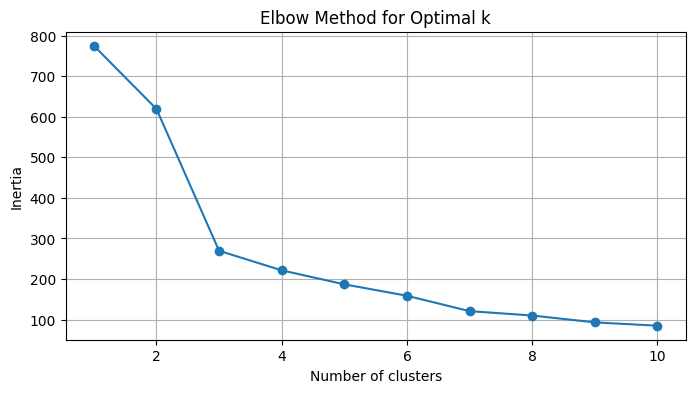

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

Apply KMeans with chosen k (e.g., 4)

In [ ]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_df['cluster'] = kmeans.fit_predict(scaled_features)

Visualize clusters using PCA

In [ ]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
customer_df['pca1'] = pca_features[:, 0]
customer_df['pca2'] = pca_features[:, 1]

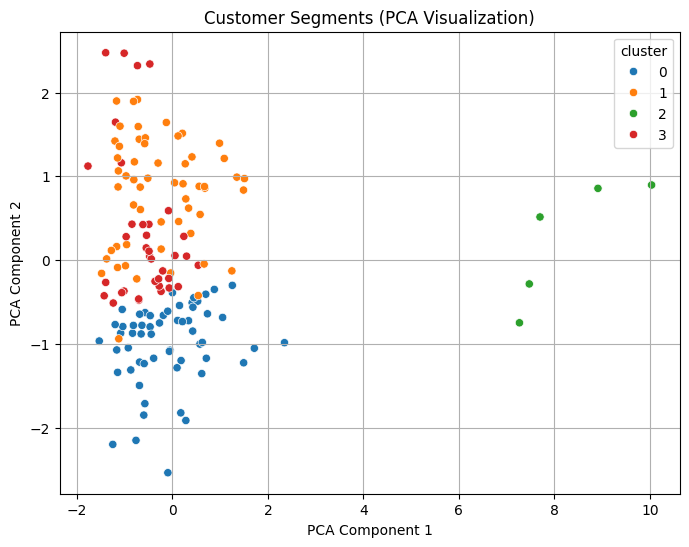

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=customer_df, x='pca1', y='pca2', hue='cluster', palette='tab10')
plt.title('Customer Segments (PCA Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

Analyze clusters

In [ ]:
cluster_summary = customer_df.groupby('cluster')[['age', 'total_quantity', 'total_spent', 'num_transactions']].mean()
print("Cluster Summary:\n", cluster_summary)


Cluster Summary:
                age  total_quantity   total_spent  num_transactions
cluster                                                           
0        38.601957       30.724138   5737.155172         12.224138
1        41.004408       26.642857   5102.678571         10.428571
2        42.061252      172.800000  29694.000000         71.400000
3        46.245332       23.805556   3923.750000          9.361111


### 📌 Marketing Strategy Suggestions:

- **Cluster 0**: High spenders → Offer premium loyalty program
- **Cluster 1**: Low purchase frequency → Use email re-engagement
- **Cluster 2**: Younger audience → Targeted social media campaigns
- **Cluster 3**: Price-sensitive → Discounts, bundle offers